#### 배깅(Bagging)
- Bootstrap Aggregation의 줄임말 (Bootstrap : 중복허용 리샘플링을 뜻하는 통계학적 용어.)
- 임의로 만든 bootstrap 데이터 셋을 통해 모델을 학습시키고 결과를 집계하는 방법
- 모두 같은 유형의 알고리즘 기반의 분류기를 사용
- 예측값의 최빈값을 최종 예측값으로 선택

#### Random Forest
- 대표적인 배깅 방식 모델로, 배깅 기법을 결정트리의 앙상블에 특화시킨 모델

![](https://velog.velcdn.com/images/newnew_daddy/post/8934deef-b1a7-49a7-b9c0-b05fb6fd5ceb/image.png)

#### 보팅 vs 배깅
- 보팅 : 학습별로 다른 모델 사용
- 배깅 : 활용하는 데이터를 랜덤하게 가져가지만 동일한 모델 사용

![](https://velog.velcdn.com/images/newnew_daddy/post/e3f5e000-940b-4486-9d8b-c824d8416864/image.png)

#### Bagging 분류기 실습

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# 조건에 맞는 데이터셋 생성
X, y = make_classification(
    n_samples=500,        # 샘플 수
    n_features=6,         # 총 특성 수
    n_informative=5,      # 정보 특성 수
    n_redundant=0,        # 중복 특성 수
    n_classes=5,          # 클래스 수
    n_clusters_per_class=1, # 각 클래스당 클러스터 수
    class_sep=1.5,        # 클래스 간의 구분 정도 (큰 값일수록 더 잘 구분됨)
    random_state=42
)

# DataFrame으로 변환
columns = [f'feature_{i}' for i in range(1, 7)]
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# 각 컬럼의 스케일을 다르게 하기 위해 변환
scales = [1, 10, 100, 1000, 0.1, 0.01]
for i, scale in enumerate(scales):
    df[f'feature_{i+1}'] *= scale

# 생성된 데이터셋 저장 (선택 사항)
df.to_csv("./dataset/sample_multiclass_dataset.csv", index=False)


   feature_1  feature_2   feature_3    feature_4  feature_5  feature_6  target
0  -0.284875  17.047723  187.513880 -2036.404485   0.246930   0.007247       1
1   1.987276 -33.129862   12.169793  2219.773399  -0.133698  -0.006408       3
2  -0.499730 -33.406223 -145.777203  4780.497106  -0.323490   0.010177       2
3   0.833334   8.154486  198.025785 -1692.479252   0.079407   0.021835       1
4  -0.450013 -17.605486 -200.557081  1644.364531  -0.029546   0.006536       2


In [49]:
df = pd.read_csv('./dataset/sample_multiclass_dataset.csv')

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,-0.284875,17.047723,187.513880,-2036.404485,0.246930,0.007247,1
1,1.987276,-33.129862,12.169793,2219.773399,-0.133698,-0.006408,3
2,-0.499730,-33.406223,-145.777203,4780.497106,-0.323490,0.010177,2
3,0.833334,8.154486,198.025785,-1692.479252,0.079407,0.021835,1
4,-0.450013,-17.605486,-200.557081,1644.364531,-0.029546,0.006536,2


In [50]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### BaggingClassifier 메소드의 주요 인자 설명

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define a base model
base_model = DecisionTreeClassifier(random_state=42)

# Define the BaggingClassifier
bagging_clf = BaggingClassifier(
    estimator=base_model,  # Bagging에 사용될 기본 학습기 (여기서는 Decision Tree)
    n_estimators=50,            # 앙상블에 포함될 기본 학습기의 수 (50개의 결정 트리)
    max_samples=0.8,            # 각 기본 학습기 학습 시 사용할 데이터 샘플의 비율 (전체 데이터의 80%)
    max_features=1.0,           # 각 기본 학습기 학습 시 사용할 특성의 비율 (전체 특성의 100%)
    bootstrap=True,             # 샘플링 시 중복 허용 여부 (True일 경우 부트스트랩 샘플링)
    bootstrap_features=False,   # 특성 샘플링 시 중복 허용 여부 (기본값은 False)
    random_state=42,            # 난수 시드 설정 (재현성을 위해 설정)
    verbose=0,                  # 학습 과정의 진행 상황 출력 정도 (0일 경우 출력 없음)
)
```

In [53]:
base_model = DecisionTreeClassifier(max_depth=3, random_state=42)

bagging_clf = BaggingClassifier(
    estimator=base_model,  # The base estimator to fit on random subsets of the dataset
    n_estimators=50,            # The number of base estimators in the ensemble
    max_samples=0.8,            # The fraction of samples to draw from X to train each base estimator
    max_features=1.0,           # The fraction of features to draw from X to train each base estimator
    bootstrap=True,             # Whether samples are drawn with replacement
    random_state=42
)

In [54]:
# Fit the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Predict using the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier accuracy: {accuracy:.2f}")

Bagging Classifier accuracy: 0.87


In [55]:
## BaggingClassifier 모델 성능 평가

print(bagging_clf.score(X_train, y_train))
print(bagging_clf.score(X_test, y_test))

0.92
0.8733333333333333


Accuracy: 0.873
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.93      1.00      0.97        28
           2       0.80      0.65      0.71        31
           3       0.89      0.94      0.91        33
           4       0.82      0.92      0.87        25

    accuracy                           0.87       150
   macro avg       0.87      0.88      0.87       150
weighted avg       0.87      0.87      0.87       150

Confusion Matrix:
[[29  1  1  2  0]
 [ 0 28  0  0  0]
 [ 3  1 20  2  5]
 [ 0  0  2 31  0]
 [ 0  0  2  0 23]]
--------------------------------------------------


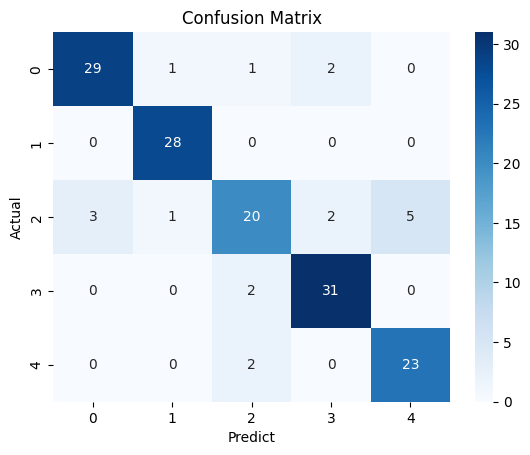

In [56]:
from utils import evaluate_cls_model

evaluate_cls_model(y_test, y_pred, False)

In [57]:
# For comparison, evaluate the base model
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Base Decision Tree accuracy: {accuracy_base:.2f}")

Base Decision Tree accuracy: 0.70


#### 결정트리 vs 랜덤포레스트

Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.9


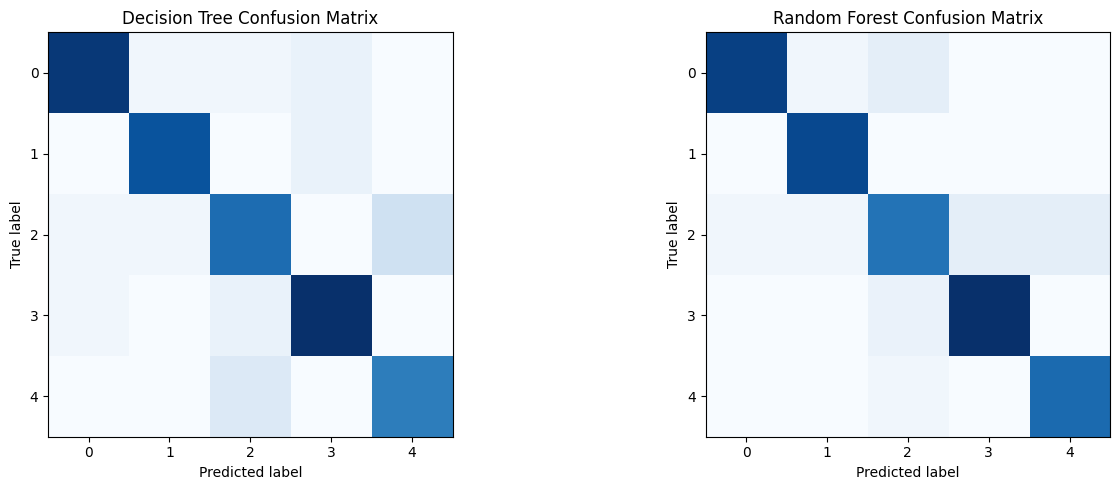

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.93      0.93      0.93        28
           2       0.77      0.74      0.75        31
           3       0.88      0.91      0.90        33
           4       0.78      0.84      0.81        25

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.93      1.00      0.97        28
           2       0.79      0.74      0.77        31
           3       0.91      0.94      0.93        33
           4       0.89      0.96      0.92        25

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
wei

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드
data = pd.read_csv('./dataset/sample_multiclass_dataset.csv')

# 데이터 분할
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 결정 트리 모델 학습 및 평가
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 랜덤 포레스트 모델 학습 및 평가
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 정확도 비교
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Random Forest Accuracy: {accuracy_rf}')

# 혼동 행렬 시각화
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

axes[1].imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()

# 분류 보고서 출력
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
